In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import pandas as pd
import seaborn as sns
import numpy as np
import ast
from wordcloud import WordCloud

import CleanTweets as ct

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import plotly.express as px

In [3]:
def draw_bubble(df, x_name, y_name, name, size_,  weight = 60, 

                height=1200, marker_size=None, xaxis= "influencer"

               , yaxis = 'retweet'):

    """df: output of agg_multi_col_bubbles"""

    """ 

    Weighted net sentiment per topic (Engagement) vs net sentiment per topic.

    Size of bubble is a measure of tweet contribution. 

    

    

    Parameters:

    df

    x_name='net_sent',  y_name='w_sent' 

    net_sentiment(float): Net sentiment per tweet (Previously calculated)

    weighted_sentiment(float): Weighted sentiment per tweet (based on influencer score and retweet count,

                                                             determined by agg_multi_col_bubbles) 

                                                             

 

    Returns:

    Bubble (scatter) graph showing weighted net sentiment (Possible Engagement) vs Net Sentiment per topic.    

    """

  

    fig = px.scatter(df, x=x_name, y=y_name,size=size_,

        hover_name=name, size_max=weight, width=1000, height=height,

                     color_discrete_sequence=px.colors.qualitative.Plotly +

                                             px.colors.qualitative.D3+

                                             px.colors.qualitative.G10+

                                             px.colors.qualitative.T10+

                                             px.colors.qualitative.Pastel,

        labels={

                     x_name: xaxis,

                     y_name: yaxis,

                 },log_y=False)

    #fig.update_layout(showlegend=False)

    

    fig.update_layout(legend=dict(

        orientation="h",

        yanchor="bottom",

        y=1.02,

        xanchor="right",

        x=1

    ))

    fig.update_layout(

                yaxis=dict(

                    title=yaxis,

                    titlefont_size=16,

                    tickfont_size=14,

                ))

    if marker_size is not None:

        fig.update_traces(mode='markers', marker_size=marker_size)

    else:

        fig.update_yaxes(showticklabels=False)

        fig.update_layout(legend_title_text='Cluster')

    fig.update_xaxes()

    fig.show()

In [4]:
# nefertiti = pd.read_csv('Nefertiti_reduced.csv')

C:\Users\Njabulo Magd\.conda\envs\4IRR\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# nerf_clean = ct.clean_tweets(nefertiti,content='content',col_name='clean_tweet',
#                 general_clean=True,lemma=True,stem=False,remove_tag=True,remove_mention=True,
#                 remove_emoji=False, remove_stopword=True,min_length=2, untokenized_return=True
#                 )

In [ ]:
# nerf_clean.to_csv('nefertiti_clean.csv')

In [4]:
nerf_clean = pd.read_csv('../data/nefertiti_clean.csv')

C:\Users\Njabulo Magd\.conda\envs\4IRR\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Time/volume tweets - line chart

In [5]:
nerf_clean.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '_type', 'url', 'date', 'content',
       'renderedContent', 'id', 'user', 'replyCount', 'retweetCount',
       'likeCount', 'quoteCount', 'conversationId', 'lang', 'source',
       'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks', 'media',
       'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags',
       'clean_tweet'],
      dtype='object')

In [6]:
int(nerf_clean.date[0][:4])

2021

In [7]:
nerf_clean.shape

(35752, 31)

In [8]:
nerf_clean['year'] = nerf_clean['date'].apply(lambda x: int(x[:4]))

In [9]:
nerf_clean['year'].sample(5)

19065    2018
3488     2020
15011    2019
24706    2017
27791    2016
Name: year, dtype: int64

## Time/volume tweets - line chart

In [10]:
tweetByYear = nerf_clean.groupby('year').count().reset_index()

In [11]:
tweetByYear

,year,Unnamed: 0,Unnamed: 0.1,_type,url,date,content,renderedContent,id,user,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet
0,2016,8875,8875,8875,8875,8875,8875,8875,8875,8875,...,0,122,370,370,2047,211,211,2643,1,8863
1,2017,4001,4001,4001,4001,4001,4001,4001,4001,4001,...,0,85,515,515,1553,172,172,1282,0,3997
2,2018,7252,7252,7252,7252,7252,7252,7252,7252,7252,...,0,335,1426,1426,2807,289,289,2352,0,7241
3,2019,6392,6392,6392,6392,6392,6392,6392,6392,6392,...,0,200,1541,1541,2821,219,219,2114,2,6377
4,2020,6122,6122,6122,6122,6122,6122,6122,6122,6122,...,0,257,2159,2159,2766,214,214,1736,0,6113
5,2021,3110,3110,3110,3110,3110,3110,3110,3110,3110,...,0,187,1249,1249,1384,50,50,782,0,3109


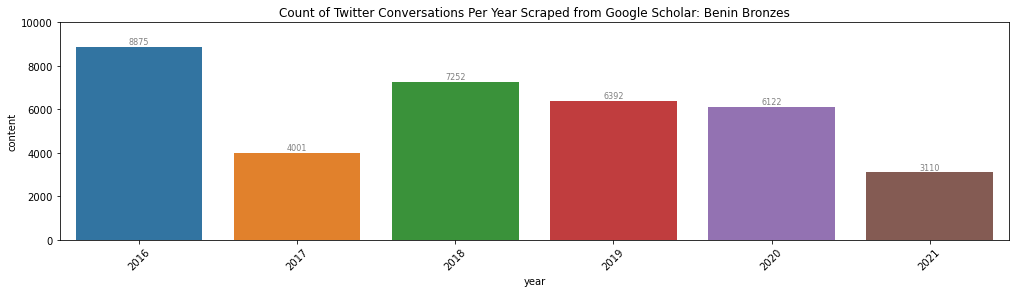

In [12]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Count of Twitter Conversations Per Year Scraped from Google Scholar: Benin Bronzes')
g = sns.barplot(data=tweetByYear, 
             x="year", 
             y="content") 
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                textcoords='offset points')
_ = ax.set_ylim(0,10000) #To make space for the annotations62222
# plt.savefig('../viz_images/TwitterConvCountNefertiti.png')

## Keywords - Network diagram

In [13]:
nerf_clean[nerf_clean.clean_tweet == None]

,Unnamed: 0,Unnamed: 0.1,_type,url,date,content,renderedContent,id,user,replyCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet,year


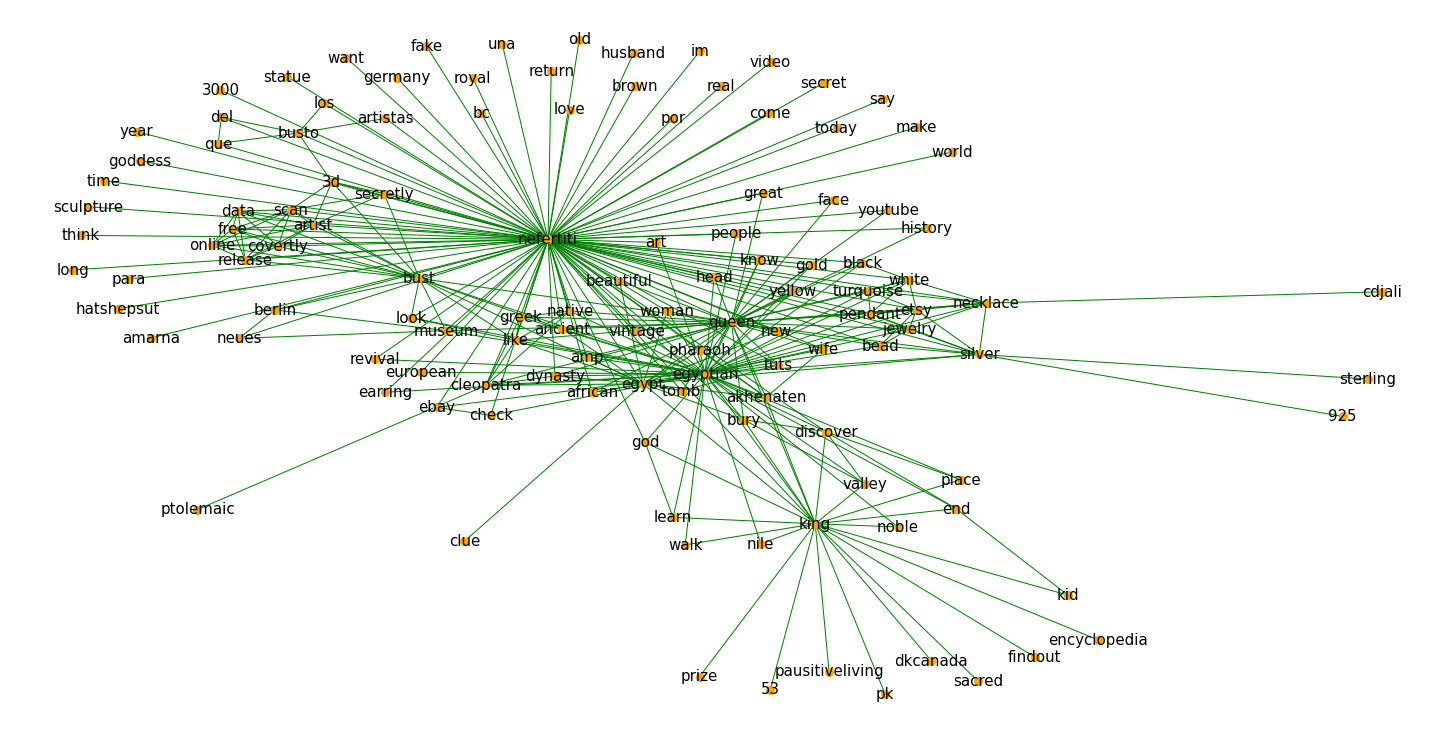

In [17]:
def network_diagram(content_col, filt_val):
    """Draws a network diagram from a given text column
    
        Args:
            :param content_col: Series of strings, column we wish to get a network of.
            :param filt_val: integer, higher numbers filters only on words that have the 
            strongest connection
    """
    
    # You can define your own parameters
    cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') 
    X = cv.fit_transform(content_col.values.astype('U'))

    # This is the matrix manipulation step
    Xc = (X.T * X) 

    # This are the entity names (i.e. keywords)
    names = cv.get_feature_names() 
    
    # create dataframe of similar names
    df_co = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

    # put df in workable format
    a = df_co.stack().reset_index()
    a.columns = ['var1', 'var2','value']

    a_filtered=a.loc[ (a['value'] > filt_val) & (a['var1'] != a['var2']) ]


    # Build your graph
    plt.figure(figsize=(20,10))

    G=nx.from_pandas_edgelist(a_filtered, 'var1', 'var2')

    # Plot the network
    nx.draw(G, with_labels=True, node_color='orange', node_size=50, edge_color='green', linewidths=2, font_size=15)

network_diagram(nerf_clean.sample(4000).clean_tweet, 50)
plt.savefig('../viz_images/NetworkDiagramNefertiti.png')

## People vs mentions - CSV list, bar chart

In [18]:
import json

In [19]:
nerf_clean[['user','mentionedUsers']].sample(10)

,user,mentionedUsers
20816,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
6105,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
31394,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
12195,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
9853,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
29526,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
7164,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
23704,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
29059,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
22484,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN


In [20]:
def mentions(mentionedUsers):
    mentions = []
    try:
        mentions = []
        for d in mentionedUsers:
            mentions.append(d['username'])
    except TypeError:
        pass
    return mentions
    

In [21]:
nerf_clean[['mentionedUsers']].iloc[3765]['mentionedUsers']

"[{'_type': 'snscrape.modules.twitter.User', 'username': 'thecarameldomme', 'id': 797315185379786754, 'displayname': '❤👑 TheCaramelDomme Indigo Blu👽♍❤', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'url': 'https://twitter.com/thecarameldomme'}, {'_type': 'snscrape.modules.twitter.User', 'username': 'kayverly3', 'id': 1282974280729403392, 'displayname': 'Kay', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'pro

In [23]:
import ast

In [50]:
pd.set_option('display.max_columns', None)  

In [53]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-53-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [24]:
nerf_clean['username'] = nerf_clean.user.apply(lambda x: ast.literal_eval(x)['username'])

In [26]:
nerf_clean['username'].sample(5)

34341         theybones
21061          Zeinobia
12139    ArmaOrientalis
7024        EleonoraCCM
17083        dj16600775
Name: username, dtype: object

In [27]:
def literal_eval(item):
    try:
        return ast.literal_eval(item)
    except ValueError:
        pass
literal_eval(np.nan)

In [28]:
nerf_clean['mentionedUsernames'] = nerf_clean.mentionedUsers.apply(lambda x: mentions(literal_eval(x)))

In [30]:
nerf_clean['mentionedUsernames'].sample(5)

22581                                  [eBay]
27727                           [cosplayblog]
4989                                       []
11440    [Keamaru1, MadjidFalastine, Vanneur]
18169                                      []
Name: mentionedUsernames, dtype: object

In [35]:
nerf_clean[['username', 'mentionedUsernames']].sample(5)

,username,mentionedUsernames
20041,FradLI64,"[secretshistoire, MuseeLouvre]"
21627,bluboy4ever,[ed_sleep]
35604,RudeGyalMauni,[arrogantasszach]
11730,_waraia,[phronimas]
4509,vhenanshiral,[]


In [36]:
nerf_clean[['username', 'mentionedUsernames']].to_csv('../data/peopleVmentions_nefertiti.csv')

In [32]:
from collections import Counter

In [37]:
mentionList = list(nerf_clean['mentionedUsernames'])
flat_list = [item for sublist in mentionList for item in sublist]
flat_list[:10]

['emzo_nefertiti',
 'GlendaM_M',
 'nefertiti_sf',
 'KTVU',
 'nasalamode',
 'mylove4mu5ic',
 'nasalamode',
 'mylove4mu5ic',
 'nasalamode',
 'mylove4mu5ic']

In [38]:
most_mentioned = dict(Counter(flat_list).most_common(20))
most_mentioned

{'Etsy': 1857,
 'YouTube': 991,
 'eBay': 596,
 'DKCanada': 335,
 'pausitiveliving': 335,
 'joshuagates': 182,
 'TODAYshow': 169,
 'travelchannel': 150,
 'hyperallergic': 143,
 'CarlosToledo94': 82,
 'Poshmarkapp': 73,
 'JoyceTyldesley': 73,
 'eBay_UK': 67,
 'Urkootegi': 66,
 'radjevac015': 65,
 'eldiarioes': 64,
 'elbarroquista': 63,
 'Nesly_Nefertiti': 63,
 'joyofmuseums': 58,
 'secretshistoire': 55}

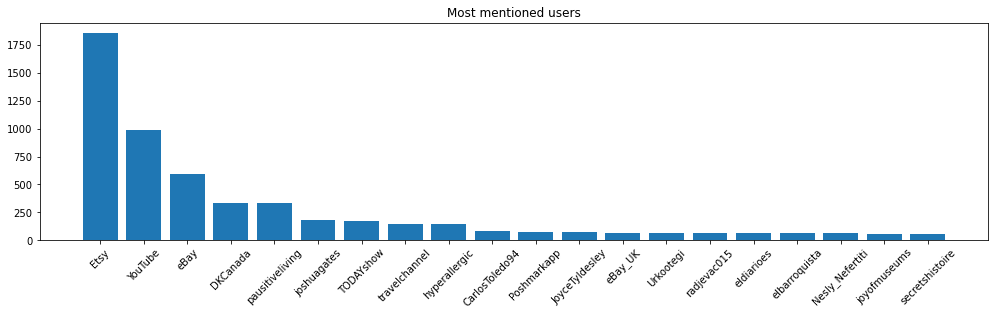

In [55]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Most mentioned users')
g = plt.bar(most_mentioned.keys(), most_mentioned.values())
ax=g
plt.savefig('../viz_images/mostMentionedNefertiti.png')

## Geography - bar chart

In [40]:
loc_bb = nerf_clean[nerf_clean.coordinates.isnull() == False]
print(loc_bb.shape)
print(nerf_clean.shape)

(1155, 34)
(35752, 34)


From our list of locations, only 1155 have a lattittude and longitude attached. The rest just have country names and states, building a chloropleth from that is a bit tricky.

For now, we will substitute with a simple bar graph with information about the countries in our dataset.

In [42]:
# loc_bb['long'] = loc_bb.coordinates.apply(lambda x:x['longitude'])
# loc_bb['lat'] = loc_bb.coordinates.apply(lambda x:x['latitude'])

In [ ]:
# import plotly.express as px

# fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            scope="usa",
#                            labels={'unemp':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [43]:
nerf_clean['location'] = nerf_clean.user.apply(lambda x: literal_eval(x)['location'])

In [44]:
has_loc = nerf_clean[nerf_clean.location != '']
has_loc.shape

(26288, 35)

In [45]:
s1 = has_loc[has_loc.location.str.contains(',')]
s1['country'] = s1.location.apply(lambda x: x.split(', ')[-1])
s1['no_words'] = s1.country.apply(lambda x: len(x.split()))
s1 = s1[s1.no_words == 1]
s1.shape

<ipython-input-45-6d46060bb0ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['country'] = s1.location.apply(lambda x: x.split(', ')[-1])
<ipython-input-45-6d46060bb0ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['no_words'] = s1.country.apply(lambda x: len(x.split()))


(9830, 37)

Origin of users that post tweets

<AxesSubplot:>

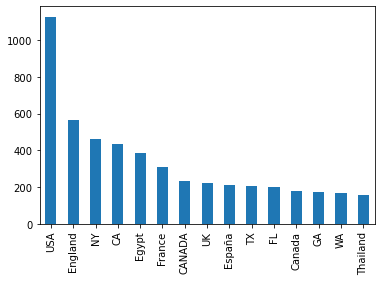

In [46]:
s1['country'].value_counts()[:15].plot(kind="bar")

## User + Retweets + Replies + Followers (agregation) - Top 20 influencers(diagram), all csv 

In [111]:
bb_df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username'],
      dtype='object')

In [47]:
nerf_clean['followersCount'] = nerf_clean.user.apply(lambda x: literal_eval(x)['followersCount'])

In [48]:
topn = nerf_clean[['username', 'retweetCount', 'replyCount']].groupby('username').sum().sort_values('retweetCount', ascending=False).reset_index()

In [49]:
topn

,username,retweetCount,replyCount
0,lilac_spawn,5939,26
1,joshuagates,2426,2628
2,VADA_ONLINE,1826,863
3,CARAA_Center,964,38
4,trtworld,936,156
...,...,...,...
21254,OfficialFEATURE,0,0
21255,OfficialDreamio,0,0
21256,Official48Indo,0,0
21257,Of_RobotandGod,0,1


In [50]:
topInfl = pd.merge(topn, nerf_clean[['username', 'followersCount']], how='left', on='username').drop_duplicates().groupby('username').mean().round().reset_index().sort_values('retweetCount', ascending=False)

In [51]:
topInfl

,username,retweetCount,replyCount,followersCount
16650,lilac_spawn,5939.0,26.0,5463.0
16019,joshuagates,2426.0,2628.0,340628.0
10722,VADA_ONLINE,1826.0,863.0,6930.0
1887,CARAA_Center,964.0,38.0,38334.0
20496,trtworld,936.0,156.0,407458.0
...,...,...,...,...
7867,OfficialFEATURE,0.0,0.0,2799.0
7866,OfficialDreamio,0.0,0.0,622.0
7865,Official48Indo,0.0,0.0,2312.0
7863,Of_RobotandGod,0.0,1.0,159.0


In [56]:
topInfl.to_csv('../data/topInfluencers_nefertiti.csv')

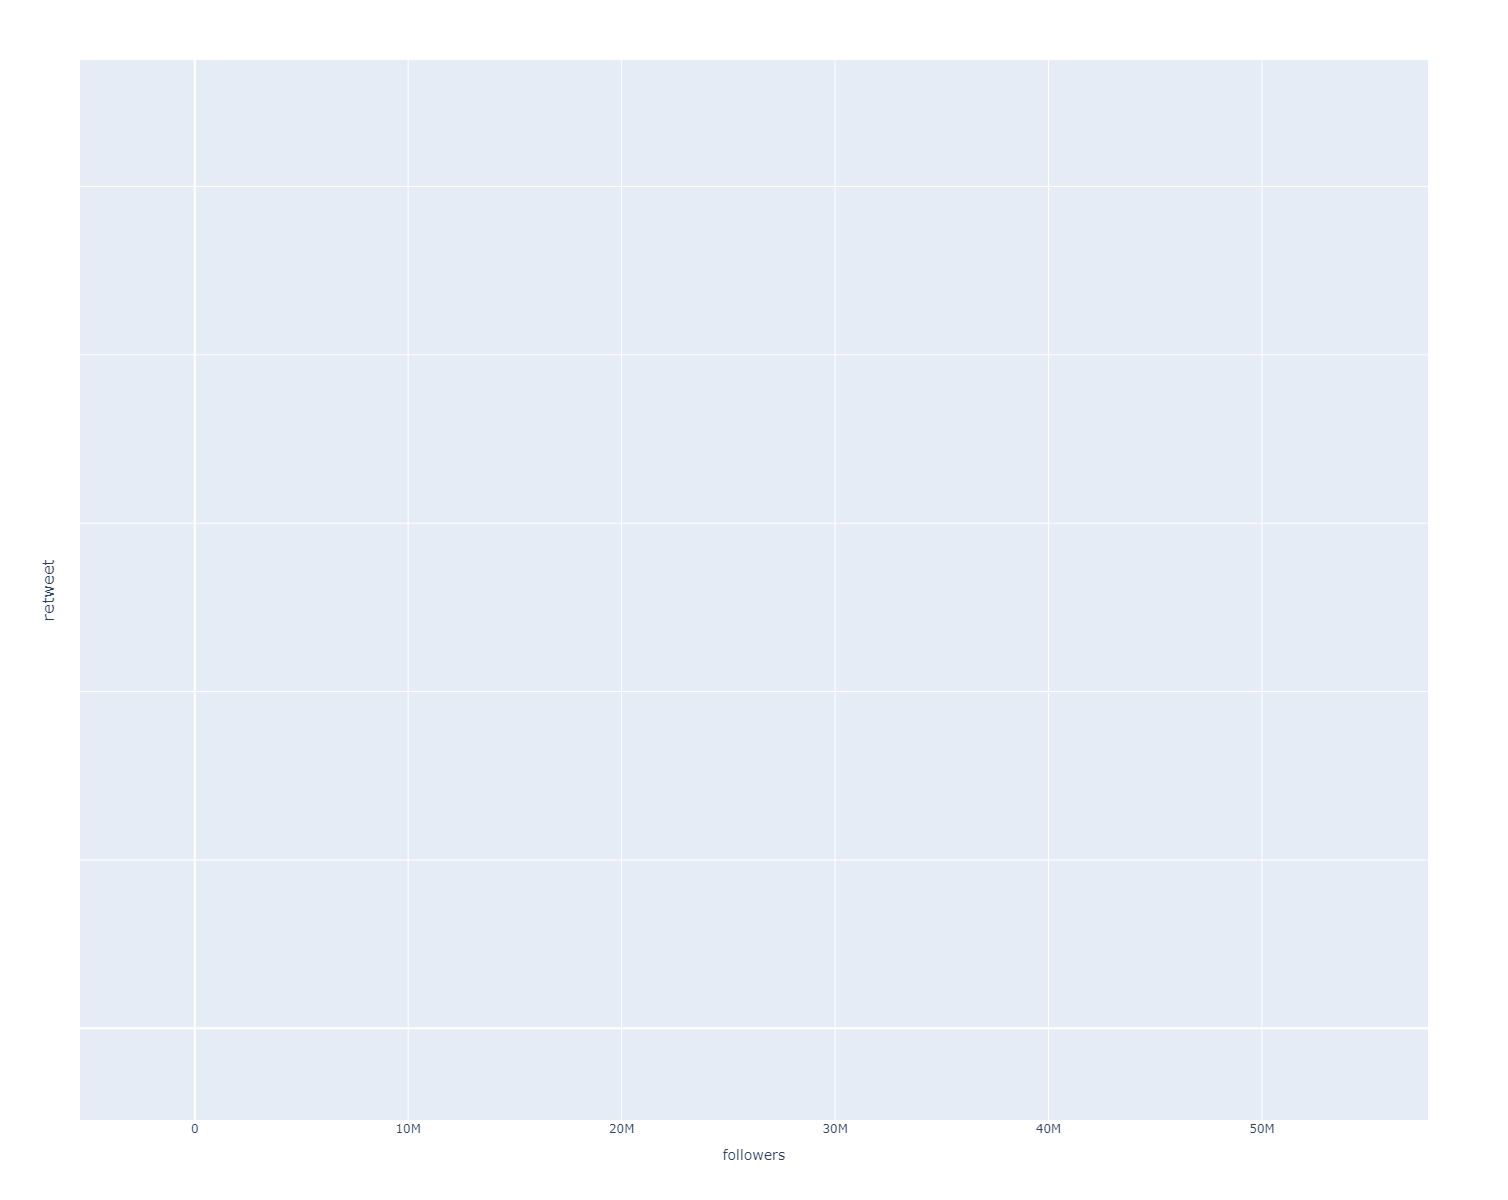

In [54]:
draw_bubble(topInfl, 'followersCount', 'replyCount', 'username', size_ = 'retweetCount',  weight = 60, height=1200, marker_size=None, xaxis= "followers", yaxis = 'retweet')

## Time/volume news 